# 2. Photometric Redshifts of galaxies (Part I): Linear Fitting 

Serie of Linear Methods to train the training set A

In [2]:
#     Include all required python-related packages     ##
import pandas as pd #dataframes
import numpy as np #deal with arrays
import matplotlib.pyplot as plt #plotting
import seaborn as sns #Statistical visualization
from astropy.table import Table #Read tables
#to show plots in line
%matplotlib inline 
sns.set(style="white") #Features of seaborn
from matplotlib import rcParams
rcParams['xtick.labelsize'] = 15
rcParams['ytick.labelsize'] = 15
rcParams['axes.labelsize'] = 15


#For this problem: LINEAR METHODS from SKLEARN
from sklearn.linear_model import Ridge, Lasso, LinearRegression


#PCA for data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Class for fitting with linear methods
I create a class to make fittings easily by means of creating objects of this class (my programming style tend to over abuse the object-oriented features of Python).

In [57]:
class Linear_Fitting(object):
    # Design constructor:
    
    def __init__(self, X, Y, funct):
        
        self.func = funct
        self.X=X
        self.Y=Y
        self.alpha=0.0001
        
    def fit(self, printing=False):
        
        if self.func == Lasso:
            print "Model -- {}\n".format("Lasso")
            self.string_func="Lasso"
            self.model = self.func(alpha = self.alpha, fit_intercept=True)
            self.res = self.model.fit(self.X, self.Y)
            self.Z_pred = self.model.predict(self.X)
            self.residuals = self.Z_pred - self.Y
            self.residuals_relative = self.residuals/self.Y
            self.coef = list(self.res.coef_)            
            self.intercept = self.res.intercept_
            
            if printing==True:
                print(" The best-fit:\n\n   zphot = {0:.3f}+ {1:.3f} (mag_r) + {2:.3f} (mag_g) + {3:.3f} (mag_u) + {4:.3f} (mag_i)\n".format(self.intercept, self.coef[0], self.coef[1], self.coef[2], self.coef[3]))
            self.Etheta=np.median(np.abs((self.Y-self.Z_pred)/(1 + self.Y)))
            print("Training Error:\n\n   Etheta = {}\n".format(self.Etheta))

        elif self.func == LinearRegression:
            print "Model -- {}\n".format("LinearRegression")
            self.string_func="LinearRegression"
            self.model = self.func(fit_intercept=True)
            self.res = self.model.fit(self.X, self.Y, sample_weight=1./(self.Y))
            self.Z_pred = self.model.predict(self.X)
            self.residuals = self.Z_pred - self.Y
            self.residuals_relative = self.residuals/self.Y
            self.coef = list(self.res.coef_)            
            self.intercept = self.res.intercept_
            
            if printing==True:
                print(" The best-fit:\n\n   zphot = {0:.3f}+ {1:.3f} (mag_r) + {2:.3f} (mag_g) + {3:.3f} (mag_u) + {4:.3f} (mag_i) +{4:.3f} (mag_z)\n".format(self.intercept, self.coef[0], self.coef[1], self.coef[2], self.coef[3], self.coef[4]))
            
            self.Etheta=np.median(np.abs((self.Y-self.Z_pred)/(1 + self.Y)))
            print("Training Error:\n\n   Etheta = {}\n".format(self.Etheta))

        elif self.func == Ridge:
            print "Model -- {}\n".format("Ridge")
            self.string_func="Ridge"
            self.model = self.func(alpha = self.alpha, fit_intercept=True)
            self.res = self.model.fit(self.X, self.Y)
            self.Z_pred = self.model.predict(self.X)
            self.residuals = self.Z_pred - self.Y
            self.residuals_relative = self.residuals/self.Y
            self.coef = list(self.res.coef_)
            self.intercept = self.res.intercept_
            
            if printing==True:
                print(" The best-fit:\n\n   zphot = {0:.3f}+ {1:.3f} (mag_r) + {2:.3f} (mag_g) + {3:.3f} (mag_u) + {4:.3f} (mag_i)\n".format(self.intercept, self.coef[0], self.coef[1], self.coef[2], self.coef[3]))
            self.Etheta=np.median(np.abs((self.Y-self.Z_pred)/(1 + self.Y)))
            print("Training Error:\n\n   Etheta = {}\n".format(self.Etheta))
            
        else: 
            print "No available function"

            
    def running_median(self, x, y, N = None, binsize = None):
        """Calculate the median in N windows, or windows of size binsize.
            This ignores all edge effects - caveat emptor
            Inherited from Jarle
        """

        if binsize is not None:
            bins = np.arange(0.0, x.max(), binsize)
            N = len(bins)
        else:
            bins = np.linspace(0.0, x.max(), int(N))
            binsize = bins[1]-bins[0]
        
        # This finds the bins that each x should go in.
        # This is convenient for expanding the routine to accept other functions.
        idx  = np.digitize(x, bins)
    
        r_med = [np.median(y[idx==k]) for k in range(int(N))]
        # I also want the x-positions in the bins. I use mean for that
        x_bins = [np.mean(x[idx==k]) for k in range(int(N))]
    
        return np.array(x_bins), np.array(r_med), bins    
        
        
    def plot(self):
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 5))
        axes[0].set_title(r'{}'.format(self.string_func), fontsize=20)
        axes[0].scatter(self.Y, self.Z_pred, alpha=0.1, label = '{}'.format(self.string_func))
        #x_bins, r_med, bins = self.running_median(self.Y, self.residuals_relative, N = 5, binsize = 0.15)
        #axes[0].plot(x_bins, r_med, lw = 3, color = 'red', label = 'Jarle')
        
        axes[0].plot(np.linspace(min(self.Z_pred), max(self.Z_pred)), np.linspace(min(self.Z_pred), max(self.Z_pred)), 'b')
        
        axes[0].set_xlabel('$z_{spec}$', fontsize=15)
        axes[0].set_ylabel(r'$z_{phot}$', fontsize=15)   
        #axes[0].legend()
        
        axes[1].scatter(Zspec, self.residuals_relative, alpha=0.1)
        axes[1].set_xlabel('$z_{spec}$', fontsize=15)
        axes[1].set_ylabel(r'$(z_{phot}-z_{spec})/z_{spec}$', )

        
    def generalization_error(self, X_test, Y_test):
        self.ytesting = self.model.predict(X_test)
        self.Etheta_g=np.median(np.abs((Y_test-self.ytesting)/(1 + Y_test)))
        print("Generalization Error:\n\n   Etheta = {}\n".format(self.Etheta_g))

    def score(self, X_test, Y_test):
        print "Score:\n\n   s = {}".format(self.model.score(X_test, Y_test))

### Reading and preparing data:

In [8]:
#Read tables using astropy and transforming them to pandas. Set the directory where the tables are for convenience.
directory="/Users/guadalupecanasherrera/DDM2017_FinalProject/FinalProject/Q2/Tables/"
A=Table.read(directory+"PhotoZFileA.vot").to_pandas()
B=Table.read(directory+"PhotoZFileB.vot").to_pandas()

In [5]:
#I save in panda dataframe structures magnitudes for the colors:
#Table A
A['mag_g']    = A['mag_r'].values + A["g-r"].values
A['mag_u']    = A['mag_g'].values + A["u-g"].values
A['mag_i']    = A['mag_r'].values - A["r-i"].values
A['mag_z']    = A['mag_i'].values - A["i-z"].values

In [6]:
#Table B
B['mag_g']    = B['mag_r'].values + B["g-r"].values
B['mag_u']    = B['mag_g'].values + B["u-g"].values
B['mag_i']    = B['mag_r'].values - B["r-i"].values
B['mag_z']    = B['mag_i'].values - B["i-z"].values

In [7]:
#Save in variables for fitting required by AstroML
X = np.vstack((A['mag_r'].values, A['mag_g'].values, A['mag_u'].values, A['mag_i'].values, A['mag_z'].values,
               A['z_spec'].values)).T
M = np.vstack((A['mag_r'].values, A['mag_g'].values, A['mag_u'].values, A['mag_i'].values, A['mag_z'].values)).T
M_color=np.vstack((A['u-g'].values, A['g-r'].values, A['r-i'].values, A['i-z'].values)).T
Zspec=A['z_spec'].values
M_test = np.vstack((B['mag_r'].values, B['mag_g'].values, B['mag_u'].values, B['mag_i'].values, B['mag_z'].values)).T
M_color_test=np.vstack((B['mag_r'].values, B['u-g'].values, B['g-r'].values, B['r-i'].values, B['i-z'].values)).T
Zspec_test=B['z_spec'].values
#weights = 1./Zspec


#REMEMBER: A=TRAINING DATA
#          B=TESTING DATA

### Making PCA
I transform the data using PCA. GOAL: making orthogonal transformation to find a better minimum in likelihood. It did not work as expected. Some issues with the data... 

In [43]:
#Making PCA
pca = PCA(whiten=False, n_components=5)
scl = StandardScaler()
Xs = scl.fit_transform(M)
pca.fit(Xs)
#pca.fit(M_color)
pcs=pca.transform(Xs)
pcsb=pca.inverse_transform(pcs)
#pcs.shape

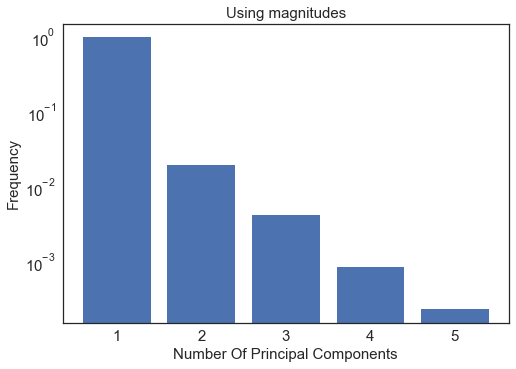

In [44]:
#pca.components_
ax = plt.subplot()
ax.bar(np.arange(1, len(pca.explained_variance_ratio_)+1, 1), pca.explained_variance_ratio_)
ax.set_xlabel("Number Of Principal Components", fontsize=15)
ax.set_ylabel("Frequency", fontsize=15)
ax.set_title("Using magnitudes", fontsize=15)
ax.set_yscale("log")
plt.show()

In [61]:
#Saving eigenvectors: This was an intentional try of projecting the data in the less-important principal component
#to perform the fitting later.
from numpy import linalg as LA
ev1 =pca.components_[:, 0]
ev2 =pca.components_[:, 1]
ev3 =pca.components_[:, 2]
ev4 =pca.components_[:, 3]
ev5 =pca.components_[:, 4]
#v=np.vstack([ev3, ev4, ev5, ev1, ev2])
vr=np.vstack([ev4])
#Projecting to the perpendicular vector, maybe possibility to find any other minimum in likelihood???
pcsmp_m = np.zeros((1, len(Zspec)))
for i in range(len(Zspec)):
    pcsmp_m[:, i] = np.matmul(vr, np.array([A['mag_r'].values[i], A['mag_g'].values[i], 
                                            A['mag_u'].values[i], A['mag_i'].values[i], A['mag_z'].values[i]]).T)

### Visualization of the data:

I use seaborn to have an idea how the data look like. CAREFUL: DON'T RUN IT IF NOT INTERESTED. It takes some time...

In [ ]:
colnames=['$m_r$', '$m_g$', '$m_u$', '$m_i$', '$m_z$']
pM=pd.DataFrame(M, columns=colnames)
sns.pairplot(pM)

In [ ]:
colnames=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
pM=pd.DataFrame(pcs, columns=colnames)
sns.pairplot(pM)

In [ ]:
#Plotting coming back from PCA... but if the number of components is equal, it does not change anything
#colnames=['mag_r', 'mag_g', 'mag_u', 'mag_i', 'mag_z']
#pM=pd.DataFrame(pcsb, columns=colnames)
#sns.pairplot(pM)

###  LinearRegression


Model -- LinearRegression

 The best-fit:

   zphot = 0.318+ -0.033 (mag_r) + -0.015 (mag_g) + -0.173 (mag_u) + -0.132 (mag_i) +-0.132 (mag_z)

Training Error:

   Etheta = 0.0143251420042

Generalization Error:

   Etheta = 0.0144699387398



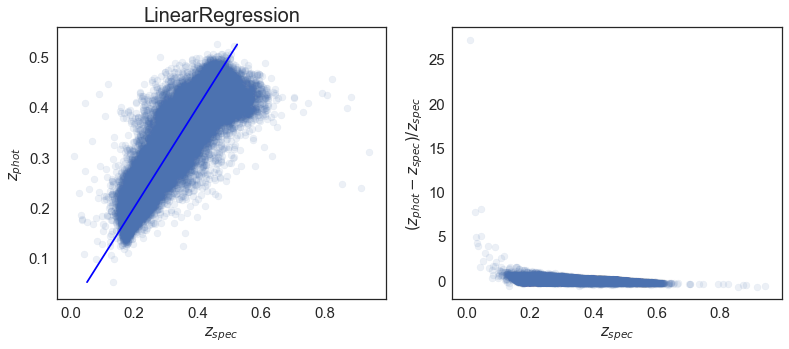

In [58]:
model_linear = Linear_Fitting(pcs[:, :], Zspec, LinearRegression)
model_linear.fit(printing=True)
model_linear.plot()
Xsb = scl.fit_transform(M_test)
pcsb=pca.transform(Xsb)
model_linear.generalization_error(pcsb[:, :], Zspec_test)

### Ridge

Model -- Ridge

 The best-fit:

   zphot = 0.323+ -0.034 (mag_r) + -0.006 (mag_g) + -0.155 (mag_u) + -0.191 (mag_i)

Training Error:

   Etheta = 0.0145588611233

Generalization Error:

   Etheta = 0.0146194902485



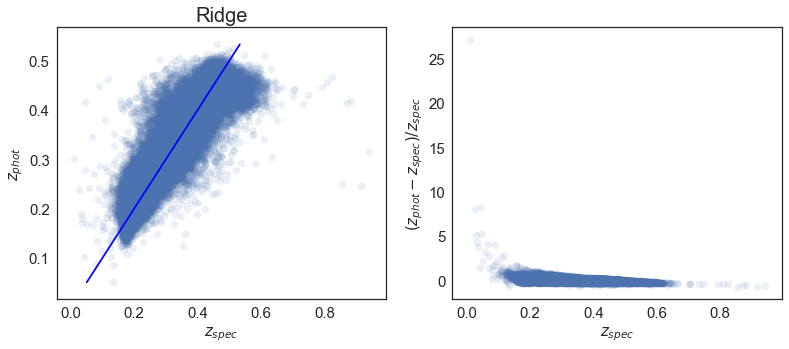

In [59]:
model_ridge = Linear_Fitting(pcs[:, :], Zspec, Ridge)
model_ridge.alpha = 1E-20
model_ridge.fit(printing=True)
model_ridge.plot()
model_ridge.generalization_error(pcsb[:, :], Zspec_test)

### Lasso

0.0001
1e-30
Model -- Lasso

 The best-fit:

   zphot = 0.323+ -0.034 (mag_r) + -0.006 (mag_g) + -0.155 (mag_u) + -0.191 (mag_i)

Training Error:

   Etheta = 0.0145588611233

Generalization Error:

   Etheta = 0.0146194902485



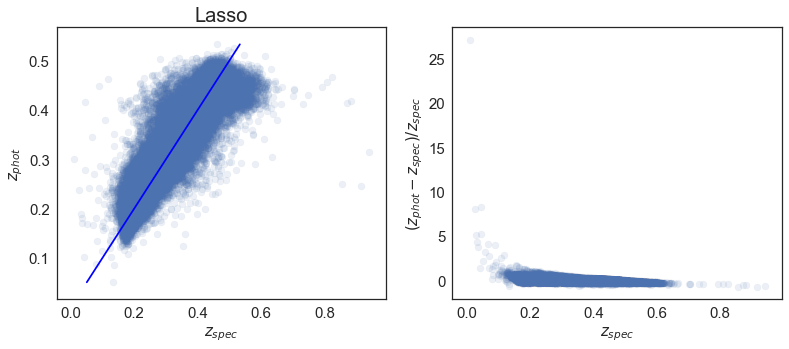

In [60]:
model_lasso = Linear_Fitting(pcs[:, :], Zspec, Lasso)
print model_lasso.alpha
model_lasso.alpha=1E-30
print model_lasso.alpha
model_lasso.fit(printing=True)
model_lasso.plot()
model_lasso.generalization_error(pcsb[:, :], Zspec_test)